# Ajustement du BERT pour les tâches en aval

Jusqu'à présent, nous avons appris à utiliser le modèle BERT pré-entraîné. Maintenant, apprenons à affiner le modèle BERT pré-entraîné pour les tâches en aval. Notez que le réglage fin implique que nous ne formons pas BERT à partir de zéro ; au lieu de cela, nous utilisons le BERT pré-entraîné et mettons à jour ses poids en fonction de notre tâche. 

Dans cette section, nous allons apprendre à affiner le modèle BERT pré-entraîné pour les tâches en aval suivantes : 

* Classification de texte
* NER 
* Question-réponse



## classification de t ext 

Apprenons à affiner le modèle BERT pré-entraîné pour une tâche de classification de texte. Saywe effectue une analyse des sentiments. Dans la tâche d'analyse des sentiments, notre objectif est de classer si une phrase est positive ou négative. 

Supposons que nous ayons un ensemble de données contenant des phrases avec leurs étiquettes. Considérez une phrase : j'aime Paris. Tout d'abord, nous tokenisons la phrase, ajoutons le jeton [CLS] au début et ajoutons le jeton [SEP] à la fin de la phrase. Ensuite, nous alimentons les jetons en entrée du modèle BERT pré-entraîné et obtenons les incorporations de tous les jetons. Ensuite, nous ignorons l'intégration de tous les autres jetons et ne prenons que l'intégration du jeton [CLS], qui est $[R_[cls]$. L'incorporation du jeton [CLS] contiendra la représentation globale de la phrase. 

Nous alimentons un classificateur (réseau feed-forward avec fonction softmax) et formons le classificateur pour effectuer une analyse des sentiments.

 Attendre! En quoi cela diffère-t-il de ce que nous avons vu au début de la section ? En quoi le réglage précis du modèle BERT pré-entraîné diffère-t-il de l'utilisation du modèle BERT pré-entraîné comme extracteur de caractéristiques ? entraîner le classificateur à effectuer la classification.
 
  De même, lors du réglage fin, nous alimentons l'intégration de à un classificateur et formons le classificateur pour effectuer la classification. La différence est que lorsque nous peaufinons le modèle BERT pré-entraîné, nous mettons à jour les poids du modèle avec un classificateur. Mais lorsque nous utilisons le modèle BERT pré-entraîné comme extracteur de caractéristiques, nous ne mettons à jour que les poids du classificateur et non le modèle BERT pré-entraîné. Lors du réglage fin, nous pouvons ajuster les poids du modèle des deux manières suivantes : 
  
* Mettre à jour les poids du modèle BERT pré-entraîné avec la couche de classification. 
* Mettre à jour uniquement les poids de la couche de classification et non le modèle BERT pré-entraîné. Lorsque nous faisons cela, cela revient à utiliser le modèle BERT pré-entraîné comme extracteur de caractéristiques


La figure suivante montre comment nous affinons le modèle BERT pré-entraîné pour une tâche d'analyse de sentiment:

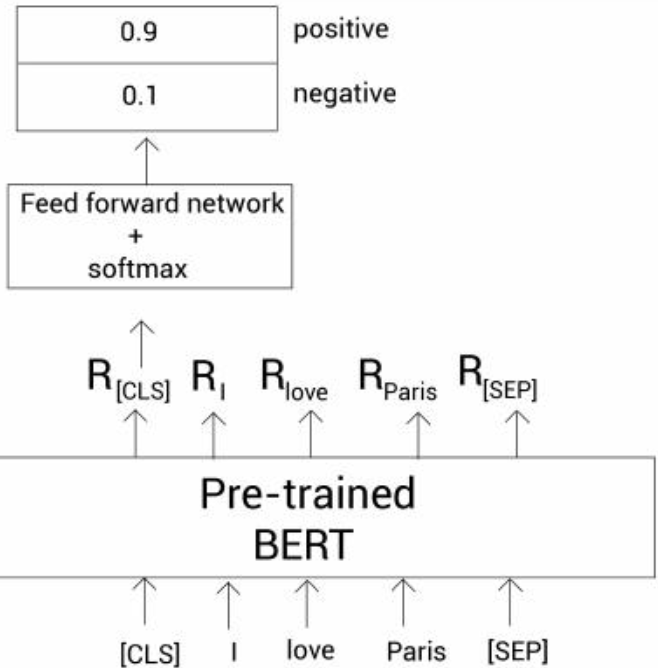

Comme nous pouvons l'observer à partir de la figure précédente, nous alimentons les jetons au modèle BERT pré-entraîné et obtenons les intégrations de tous les jetons. Nous prenons l'intégration du jeton [CLS] et le transmettons à un réseau feedforward avec une fonction softmax et effectuons une classification. 

## Question-réponse

Dans une tâche de question-réponse, on nous donne une question avec un paragraphe contenant une réponse à la question. 

Notre objectif est d'extraire la réponse du paragraphe pour la question donnée. Maintenant, apprenons à affiner le modèle BERT pré-entraîné pour effectuer une tâche de question-réponse. 

L'entrée du modèle BERT sera une paire question-paragraphe. C'est-à-dire que nous alimentons une question et un paragraphe contenant la réponse à la question à BERT et il doit extraire la réponse du paragraphe. Donc, essentiellement, BERT doit renvoyer la plage de texte qui contient la réponse du paragraphe. Comprenons cela avec un exemple

considérons la paire question-paragraphe suivante : 

Question = « Qu'est-ce que le système immunitaire ? » 

Paragraphe = « Le système immunitaire est un système de nombreuses structures et processus biologiques au sein d'un organisme qui protège contre la maladie. Pour fonctionner correctement, un système immunitaire doit détecter une grande variété d'agents, appelés agents pathogènes, des virus aux vers parasites, et les distinguer des propres tissus sains de l'organisme. "


Maintenant, notre modèle doit extraire une réponse du paragraphe ; il doit essentiellement renvoyer la plage de texte contenant la réponse. Donc, il devrait renvoyer ce qui suit : 

Réponse = "un système de nombreuses structures et processus biologiques au sein d'un organisme qui protège contre les maladies"


D'accord, comment pouvons-nous affiner le modèle BERT pour effectuer cette tâche ? Pour ce faire, notre modèle doit comprendre l'index de début et de fin de la plage de texte contenant la réponse dans le paragraphe donné. Par exemple, prenez la question « Qu'est-ce que le système immunitaire ? » 

Si notre modèle comprend que la réponse à cette question commence à l'index 4 ("un") et se termine à l'index 21 ("maladies"), alors nous pouvons obtenir la réponse comme indiqué ici :

Paragraphe = "Le système immunitaire est **un système de plusieurs système de nombreuses structures et processus biologiques au sein d'un organisme qui protège contre les maladies"** structures et processus biologiques au sein d'un organisme qui protège contre les maladies. Pour fonctionner correctement, un système immunitaire doit détecter une grande variété d'agents, appelés agents pathogènes, des virus aux vers parasites, et les distinguer des propres tissus sains de l'organisme. la réponse ? 


Si nous obtenons la probabilité que chaque jeton (mot) dans le paragraphe soit le jeton de début et de fin (mot) de la réponse, alors nous pouvons facilement extraire la réponse, n'est-ce pas ? Oui, mais comment pouvons-nous y parvenir ? ceci, nous utilisons deux vecteurs appelés le vecteur de début $S$ et le vecteur de fin $E$ Les valeurs des vecteurs de début et de fin seront apprises pendant la formation

Tout d'abord, nous calculons la probabilité que chaque jeton (mot) du paragraphe soit le jeton de départ de la réponse. 

Pour calculer cette probabilité, pour chaque jeton $i$, nous calculons le produit scalaire entre la représentation du jeton $R_i$et le vecteur de départ $S$ . Ensuite, nous appliquons la fonction softmax au produit scalaire et obtenons la probabilité


$$P_i = \frac{e^{S.R_i}}{\sum_j e^{S.R_j}}$$

Ensuite, nous calculons l'indice de départ en sélectionnant l'indice du jeton qui a une forte probabilité d'être le jeton de départ. 

De manière très similaire, nous calculons la probabilité que chaque jeton (mot) du paragraphe soit le jeton de fin de la réponse. 

Pour calculer cette probabilité, pour chaque jeton, nous calculons le produit scalaire entre la représentation du jeton $R_i$ et le vecteur de fin $E$. Ensuite, nous appliquons la fonction softmax au produit scalaire et obtenons la probabilité

$$P_i = \frac{e^{E.R_i}}{\sum_j e^{E.R_j}}$$


Ensuite, nous calculons l'indice de fin en sélectionnant l'indice du jeton qui a une forte probabilité d'être le jeton de fin. Maintenant, nous pouvons sélectionner la plage de texte qui contient la réponse en utilisant l'index de début et de fin. 

Comme le montre la figure suivante, tout d'abord, nous segmentons la paire question-paragraphe et alimentons les jetons au modèle BERT pré-entraîné, qui renvoie les incorporations de tous les jetons $R_1$ to $R_n$.  la question et à dénote l'encastrement $R_1^"$ to $R_M^"$  des jetons dans le paragraphe

Après avoir calculé le plongement, nous calculons le produit scalaire avec les vecteurs de début/fin, appliquons la fonction softmax et obtenons les probabilités de chaque jeton dans le paragraphe étant le mot de début/fin comme indiqué ici

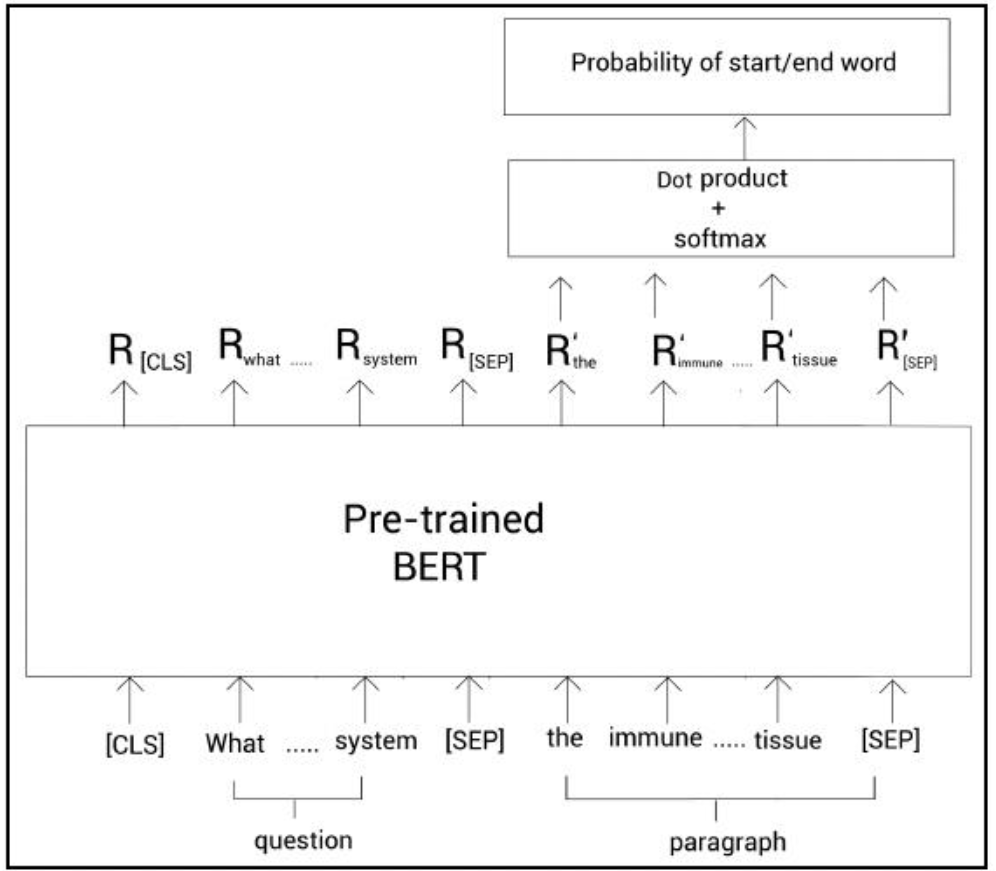


À partir de la figure précédente, nous pouvons voir comment nous calculons la probabilité que chaque jeton du paragraphe soit le mot de début/fin. Ensuite, nous sélectionnons la plage de texte contenant la réponse en utilisant les index de début et de fin avec la probabilité la plus élevée. Pour mieux comprendre comment cela fonctionne, voyons comment utiliser le modèle BERT question-réponse affiné 

## Reconnaissance des entités nommées 

Dans NER, notre objectif est de classer les entités nommées dans des catégories prédéfinies. Par exemple, considérons la phrase Jeremy vit à Paris. Dans cette phrase, « Jeremy » doit être classé comme une personne et « Paris » doit être classé comme un lieu.

Maintenant, apprenons à affiner le modèle BERT pré-entraîné pour effectuer le NER. Tout d'abord, nous tokenisons la phrase, puis nous ajoutons le jeton [CLS] au début et le jeton [SEP] à la fin. Ensuite, nous alimentons les jetons dans le modèle BERT pré-entraîné et obtenons la représentation de chaque jeton. Ensuite, nous alimentons ces représentations de jetons dans un classificateur (réseau d'anticipation + fonction softmax). Ensuite, le classificateur renvoie la catégorie à laquelle appartient l'entité nommée. Ceci est montré dans la figure suivante

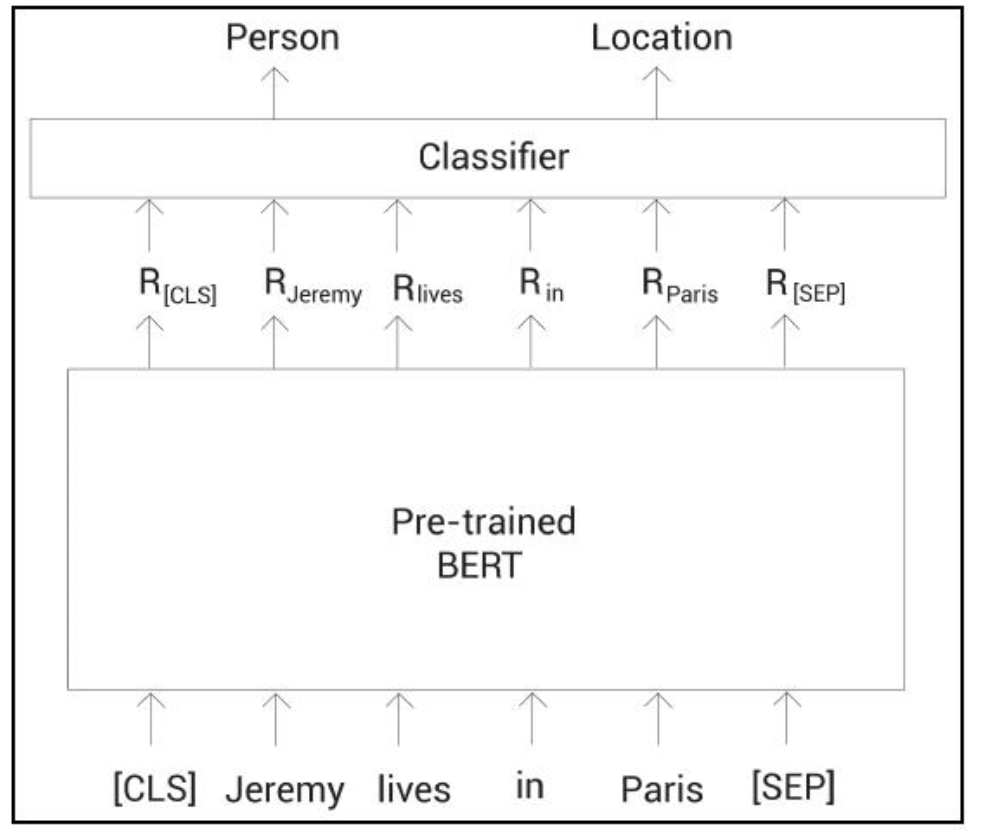

Nous pouvons affiner le modèle BERT pré-entraîné pour plusieurs tâches en aval. Jusqu'à présent, nous avons appris comment fonctionne BERT et comment utiliser le modèle BERT pré-entraîné. 

## Résumé de texte 

Le résumé de texte est le processus de conversion d'un texte long en son résumé. Supposons que nous ayons un article de Wikipédia et disons que nous ne voulons pas lire l'article en entier - nous avons juste besoin d'un aperçu de l'article. Dans ce cas, résumer l'article de Wikipédia nous aidera à avoir un aperçu de l'article. La synthèse de texte est largement utilisée pour une variété d'applications, allant de la synthèse de longs documents, d'articles de presse, de billets de blog, à bien d'autres. Dans la tâche de résumé de texte, étant donné un texte long, notre objectif est de convertir le texte long donné en son résumé, comme indiqué sur la figure :

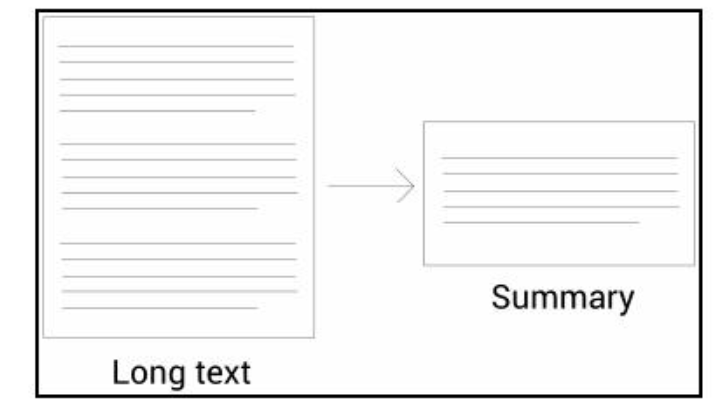


Le résumé de texte est de deux types : 

* Le résumé extractif (Extractive summarizatio)
* Le résumé abstrait (Abstractive summarization)

Explorons maintenant en détail le résumé extractif et abstrait

# Extractive summarization

En résumé extractif, nous créons un résumé à partir d'un texte donné en extrayant uniquement les phrases importantes.

 C'est-à-dire, disons qu'on nous donne un long document contenant de nombreuses phrases, avec une synthèse extractive, nous créons un résumé du document en extrayant uniquement les phrases importantes qui contiennent le sens essentiel du document.

## Résumé abstrait 

Contrairement au résumé extractif, dans le résumé abstrait, nous ne créerons pas de résumé en extrayant simplement des phrases importantes du texte donné. Au lieu de cela, dans ce type, nous créons un résumé en paraphrasant le texte donné. 

D'accord, qu'est-ce que la paraphrase ? La paraphrase implique que nous ré-exprimons le texte donné en utilisant des mots différents pour plus de clarté. Ainsi, dans un résumé abstrait, étant donné un texte, nous allons créer un résumé en réexprimant le texte donné en utilisant des mots différents contenant uniquement le sens essentiel du texte donné.


Comprenons le résumé abstrait avec un petit exemple. 

Considérons le même texte suivant : 

l'apprentissage automatique est l'étude d'algorithmes informatiques qui s'améliorent automatiquement grâce à l'expérience. Il est considéré comme un sous-ensemble de l'intelligence artificielle. Les algorithmes d'apprentissage automatique construisent un modèle mathématique basé sur des échantillons de données, appelés données d'apprentissage, afin de faire des prédictions ou des décisions sans être explicitement programmés pour le faire. Les algorithmes d'apprentissage automatique sont utilisés dans une grande variété d'applications, telles que le filtrage des e-mails et la vision par ordinateur, où il est difficile ou impossible de développer des algorithmes conventionnels



Maintenant, avec le résumé abstrait, nous créons un résumé en paraphrasant le texte donné. Ainsi, à la suite d'un résumé abstrait, notre résumé se présentera comme indiqué ici : 

l'apprentissage automatique est un sous-ensemble de l'intelligence artificielle et il est largement utilisé pour créer une variété d'applications telles que le filtrage des e-mails et la vision par ordinateur. 

D'après le résultat précédent, nous pouvons observer que notre résumé est essentiellement paraphrasé à partir du texte donné, ne contenant que le sens essentiel du texte. Maintenant que nous avons compris ce que sont les résumés extractifs et abstraits, dans la section suivante, nous allons apprendre à affiner le modèle BERT pour effectuer des résumés extractifs et abstraits.

## Ajustement de BERT pour la synthèse de texte 

Dans cette section, voyons comment affiner le modèle BERT pour effectuer la synthèse de texte. Tout d'abord, nous comprendrons comment affiner BERT pour la récapitulation extractive, puis nous verrons comment affiner BERT pour la récapitulation abstractives.




## Résumé extractif à l'aide de BERT 

Pour affiner le BERT pré-entraîné pour la tâche de résumé extractif, nous modifions légèrement le format de données d'entrée du modèle BERT. Avant d'examiner le format de données d'entrée modifié, rappelons d'abord comment nous alimentons les données d'entrée au modèle BERT. Disons que nous avons deux phrases : Paris est une belle ville. J'aime Paris. Tout d'abord, nous tokenisons ces phrases et nous ajoutons un token [CLS] uniquement au début de la première phrase et nous ajoutons un token [SEP] à la fin de chaque phrase. Avant de fournir les jetons au BERT, nous les convertissons en intégration à l'aide de trois couches d'intégration appelées intégration de jetons, intégration de segment et intégration de position. Nous résumons tous les intégrations ensemble par élément, puis nous les alimentons en entrée du BERT. Le format de données d'entrée de BERT est illustré dans la figure suivante :

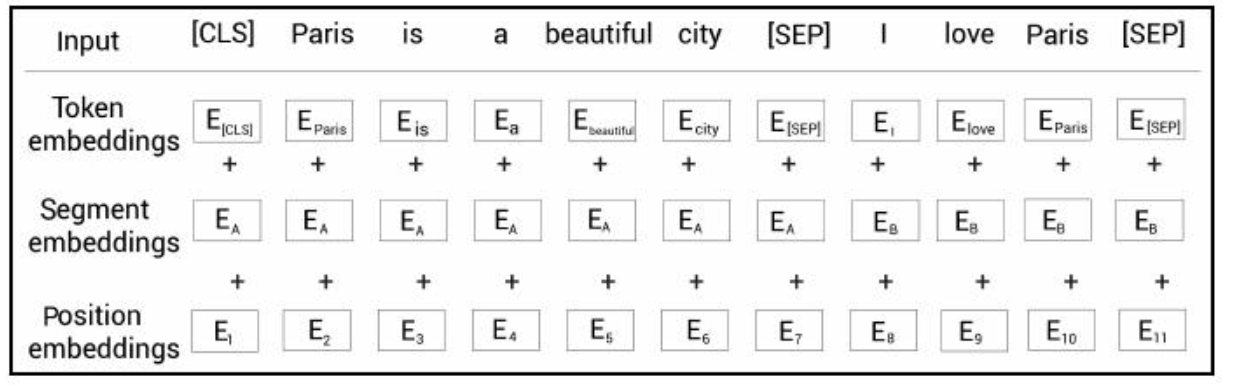

Le modèle BERT prend cette entrée et renvoie la représentation de chaque jeton en sortie, comme le montre la figure suivante:

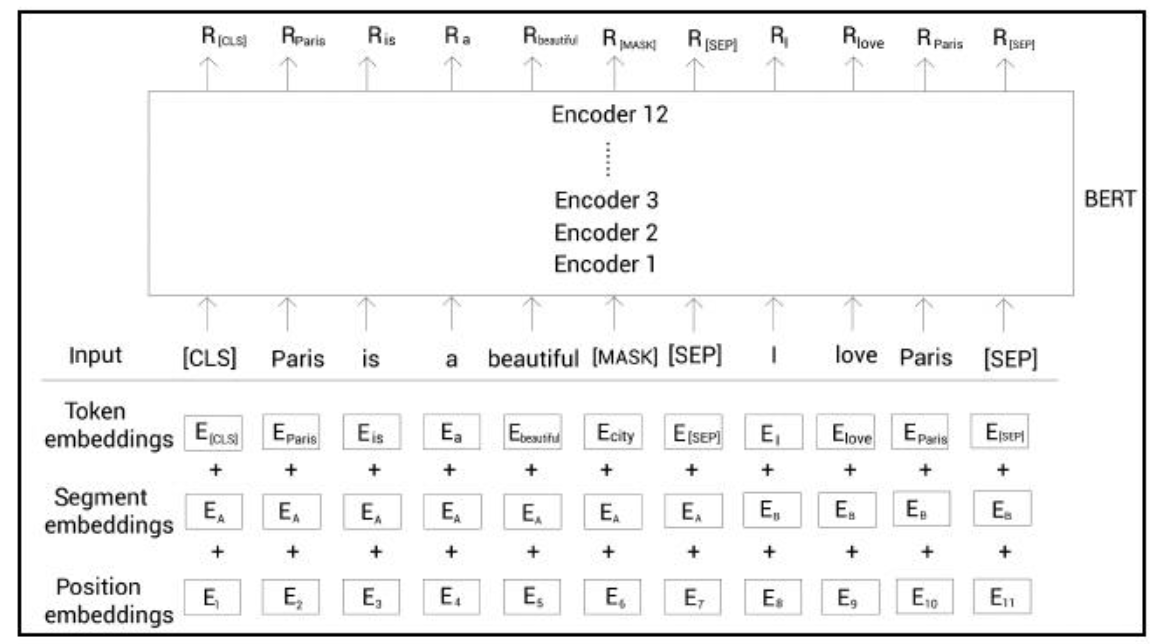


Maintenant, la question est de savoir comment pouvons-nous utiliser le BERT pour la tâche de résumé de texte ? Nous savons que le modèle BERT donne une représentation de chaque jeton. Mais nous n'avons pas besoin d'une représentation de chaque jeton. Au lieu de cela, nous avons besoin d'une représentation de chaque phrase. Mais pourquoi?


Nous avons appris que dans le résumé extractif, nous créons un résumé en ne sélectionnant que les phrases importantes. Nous savons qu'une représentation d'une phrase tiendra le sens de la phrase. Si nous obtenons une représentation de chaque phrase, alors sur la base de cette représentation, nous pouvons décider si la phrase est importante ou non. S'il est important, nous l'ajouterons au résumé, sinon nous le supprimerons. Ainsi, si nous obtenons la représentation de chaque phrase à l'aide de BERT, nous pouvons alors transmettre la représentation au classificateur et le classificateur nous dira si la phrase est importante ou non.

D'accord, comment pouvons-nous obtenir la représentation d'une phrase ? Peut-on utiliser la représentation du jeton [CLS] comme représentation de la phrase ? Oui! Mais il y a un petit hic ici. Nous avons appris que nous ajoutons le jeton [CLS] uniquement au début de la première phrase, mais dans la tâche de résumé de texte, nous alimentons plusieurs phrases au modèle BERT et nous avons besoin de la représentation de toutes les phrases.

Donc, dans ce cas, nous modifions notre format de données d'entrée au modèle BERT. Nous ajoutons le jeton [CLS] au début de chaque phrase afin que nous puissions utiliser la représentation du jeton [CLS] ajouté au début de chaque phrase comme représentation.

Disons que nous avons trois phrases : sent one, sent two et sent three. Tout d'abord, nous tokenisons ces phrases et nous ajoutons le jeton [CLS] au début de chaque phrase et nous séparons également chaque phrase avec le jeton [SEP]. Les jetons d'entrée sont illustrés ci-dessous. Comme nous pouvons le constater, nous avons ajouté le jeton [CLS] au début de chaque phrase et nous avons ajouté le jeton [SEP] à la fin de chaque phrase :

Jetons d'entrée = [ [CLS], sent, one, [SEP], [CLS], sent, two, [SEP], [CLS], sent, three, [SEP] ]


Ensuite, nous alimentons les jetons d'entrée dans les couches d'intégration de jetons, de segments et de position et convertissons les jetons d'entrée en intégrations. La couche d'intégration de jetons est illustrée dans la figure suivante :

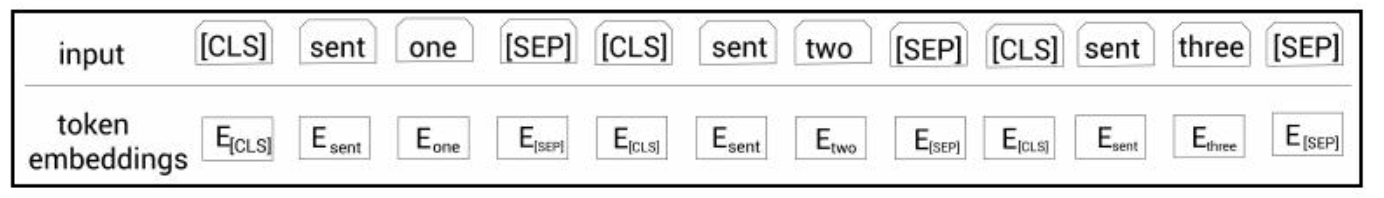

La couche suivante est la couche d'insertion de segment. Nous savons que l'inclusion de segments est utilisée pour distinguer les deux phrases données. La couche d'incorporation de segment renvoie soit deux incorporations,$E_A$ soit $E_B$. C'est-à-dire que si le jeton d'entrée appartient à la phrase A, alors le jeton sera mappé sur l'intégration $E_A$ et si le jeton d'entrée appartient à la phrase B, alors le jeton sera mappé sur l'intégration $E_B$.

 Mais dans le cadre de la synthèse de texte, nous alimentons plus de deux phrases au modèle BERT. Maintenant, comment pouvons-nous mapper les jetons de plus de deux phrases à l'intégration $E_A$ et $E_B$ ?


 Dans ce cas, nous utilisons un plongement de segment d'intervalle. L'incorporation de segment d'intervalle est utilisée pour faire la distinction entre les multiples phrases données. Avec l'incorporation de segment interne, nous mappons les jetons de la phrase apparaissant dans l'index impair à $E_A$et nous mappons les jetons de la phrase apparaissant dans l'index pair à $E_B$. Disons que nous avons quatre phrases, alors :

* Tous les jetons de la phrase 1 seront mappés sur $E_A$
* Tous les jetons de la phrase 2 seront mappés sur $E_B$ .
* Tous les jetons de la phrase 3 seront mappés sur $E_A$ .
* Tous les jetons de la phrase 4 seront mappés sur $E_B$


La couche d'inclusion de segment d'intervalle est illustrée dans la figure suivante. Comme nous pouvons l'observer, les jetons de la première phrase sont mappés sur $E_A$, les jetons de la deuxième phrase sont mappés sur $E_B$, et les jetons de la troisième phrase sont mappés sur $E_A$

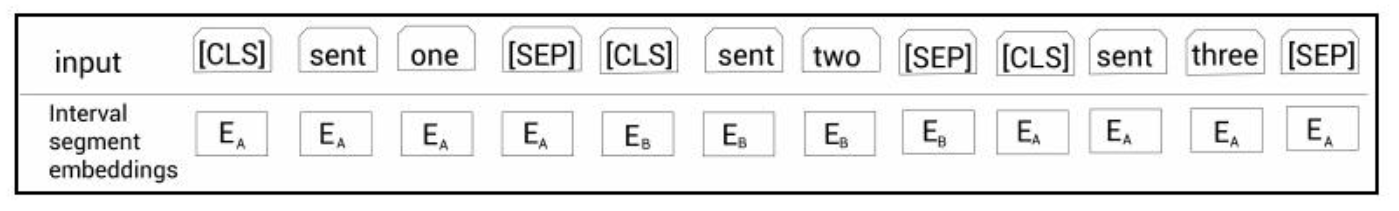

La couche suivante est la couche d'insertion de position. La couche d'insertion de position fonctionne de la même manière que nous l'avons appris auparavant. La couche d'intégration de position code les informations de position de chaque jeton dans l'entrée. La couche d'insertion positionnelle est illustrée dans la figure suivante :

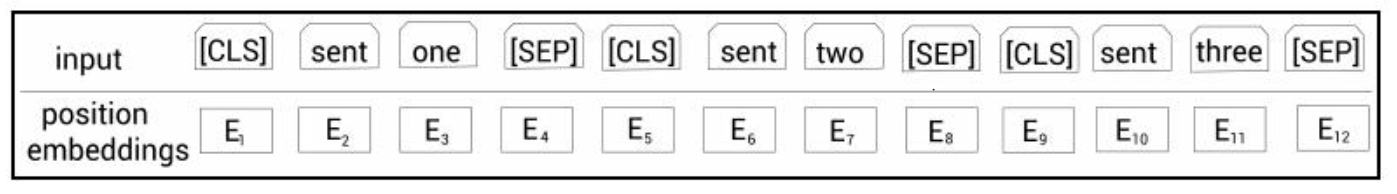

Le format de données d'entrée modifié final avec le jeton, le segment d'intervalle et les couches d'intégration de position pour la tâche de récapitulation extractive est illustré dans la figure suivante

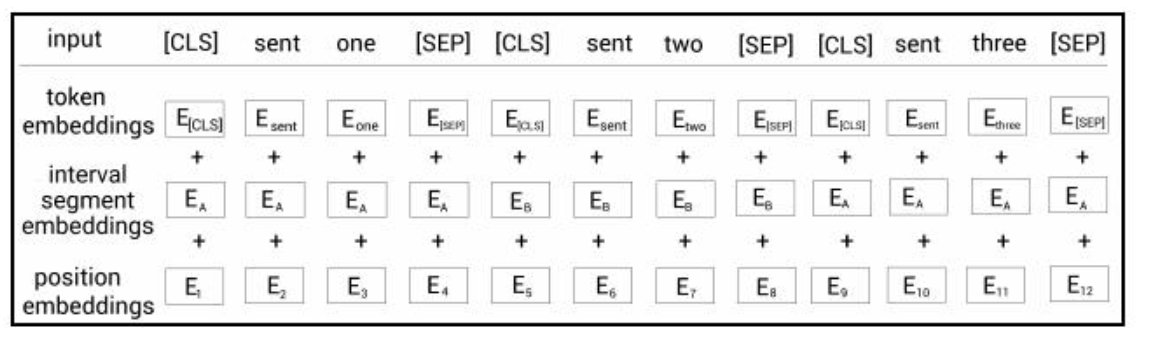

Maintenant, nous alimentons l'entrée du modèle BERT avec ce format de données d'entrée modifié. Comme le montre la figure suivante, le modèle BERT prend cette entrée et renvoie la représentation de chaque jeton en sortie. Puisque nous avons ajouté le jeton [CLS] au début de chaque phrase, nous pouvons utiliser la représentation du jeton [CLS] comme représentation de la phrase. et désigne la représentation de trois envoyés. Nous pouvons appeler le modèle BERT suivant avec le format de données d'entrée modifié BERTSUM


Comme le montre la figure suivante, $R_1$ désigne la représentation de sent one, $R_2$ désigne la représentation de sent two et $R_3$ désigne la représentation de sent three. 

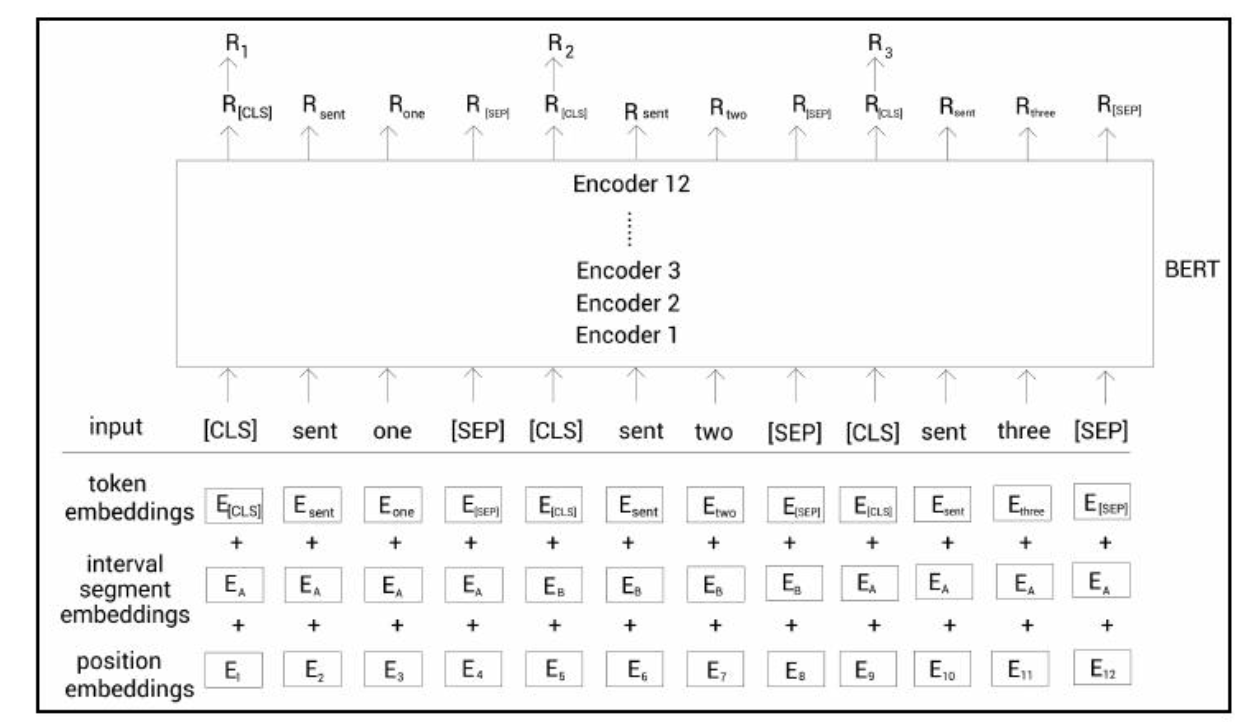

Notez que pour obtenir la représentation de la phrase, nous n'avons pas besoin de former BERT à partir de zéro. Au lieu de cela, nous pouvons utiliser n'importe quel modèle BERT pré-entraîné, mais nous avons juste besoin de modifier le format de données d'entrée de la manière dont nous avons discuté précédemment afin que nous puissions utiliser la représentation de chaque [CLS]token en tant que représentation de phrase correspondante. 

Nous avons appris à obtenir la représentation de chaque phrase dans le texte donné à l'aide d'un modèle BERT pré-entraîné, mais comment pouvons-nous utiliser ces représentations pour la tâche de récapitulation extractive ? Voyons cela dans la section suivante

## BERTSUM avec un classificateur 

Nous avons appris qu'en résumé extractif, nous créons un résumé en ne sélectionnant que les phrases importantes du texte donné. Dans la section précédente, nous avons appris comment obtenir la représentation de chaque phrase dans le texte donné à l'aide d'un modèle BERT pré-entraîné. Maintenant, nous alimentons la représentation d'une phrase à un simple classificateur binaire et le classificateur nous dit si la phrase est importante ou non. C'est-à-dire que le classificateur renvoie la probabilité que la phrase soit incluse dans le résumé. La couche de classification est souvent appelée couche de synthèse. Ceci est montré dans la figure suivante.

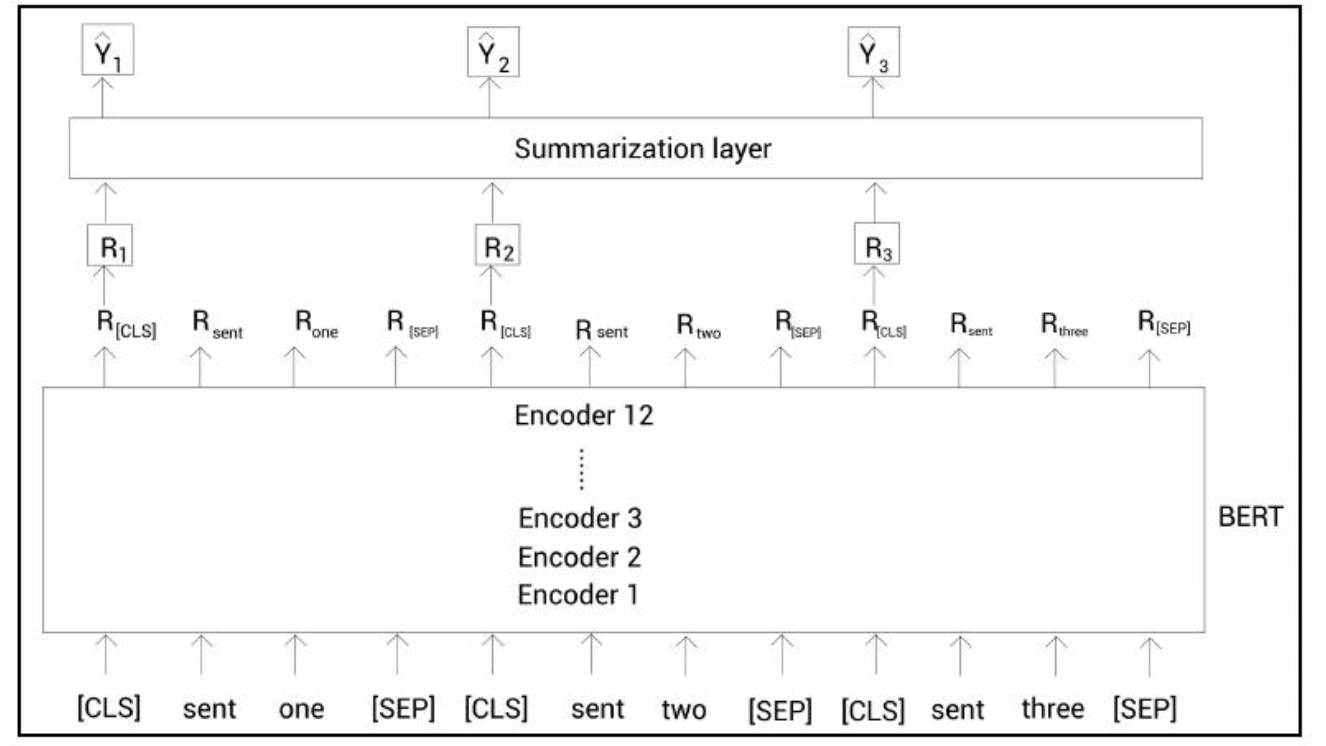

A partir de la figure précédente, nous pouvons observer que nous alimentons toutes les phrases d'un texte donné au modèle BERT pré-entraîné. Le modèle BERT pré-entraîné renverra la représentation de chaque phrase,$R_1, R_2,....R_n$ . Ensuite, nous alimentons la représentation à un classificateur (couche de récapitulation). Le classifieur renvoie alors la probabilité que la phrase soit incluse dans le résumé.

Pour chaque phrase $i$ du document, nous obtiendrons la représentation $R_i$de la phrase, et nous alimentons la représentation à la couche de résumé, qui renvoie la probabilité $y_i$ d'inclure la phrase dans le résumé

$$Y_i=\sigma(W_0R_i+b_0)$$

A partir de l'équation précédente, nous pouvons observer que nous utilisons un simple classificateur sigmoïde pour obtenir la probabilité . Nos résultats ne seront pas précis dans les itérations initiales. Ainsi, nous allons affiner le modèle en minimisant la perte de classification binaire entre la probabilité prédite et la probabilité réelle . Nous affinerons le modèle BERT pré-entraîné conjointement avec la couche de synthèse

Nous avons appris que nous utilisons un simple classificateur sigmoïde dans la couche de résumé. Mais au lieu d'un simple classificateur, peut-on essayer autre chose ? Oui, et c'est exactement ce dont nous discuterons dans la section suivante

## BERTSUM avec transformateur et LSTM 

Nous avons appris à utiliser BERTSUM. Au lieu d'utiliser uniquement le simple classificateur sigmoïde dans la couche de résumé, les chercheurs ont proposé deux approches différentes : 

* Un transformateur inter-phrase
* Mémoire à long court terme (LSTM)


C'est-à-dire qu'au lieu d'alimenter la représentation de phrase obtenue à partir du BERT directement au classificateur sigmoïde, nous pouvons l'alimenter à un transformateur et à un LSTM et apprendre une représentation encore meilleure. Comprenons cela en détail dans les sections suivantes

## BERTSUM avec un transformateur d'inter-phrase 

Avec un transformateur d'inter-phrase, nous transmettons le résultat du BERT aux transformateurs-coucheurs. C'est-à-dire que nous transmettons la représentation de la phrase obtenue à partir de BERT aux couches d'encodeur du transformateur. Mais pourquoi exactement devons-nous faire cela ? Quel est l'avantage de cela? L'encodeur du transformateur prend la représentation obtenue à partir de BERT et renvoie sa représentation d'état caché. Cette représentation de l'état caché aidera à apprendre les fonctionnalités au niveau du document en se concentrant sur la tâche de résumé. Confus? Comprenons cela en détail


Avant de continuer, récapitulons rapidement l'encodeur du transformateur. On sait que le transformateur est constitué d'un nombre L de codeurs. Chaque encodeur dans le transformateur se compose de deux sous-couches - l'attention multi-têtes et un réseau d'anticipation avec normalisation de couche. La figure suivante montre deux encodeurs (seul l'encodeur 1 est développé). On peut observer que le codeur est constitué de deux sous-couches. Nous pouvons également remarquer qu'avant d'alimenter l'entrée à l'encodeur, nous ajoutons l'intégration positionnelle à l'entrée. L'encodeur final (encodeur le plus haut) renvoie la représentation de l'état caché en sortie

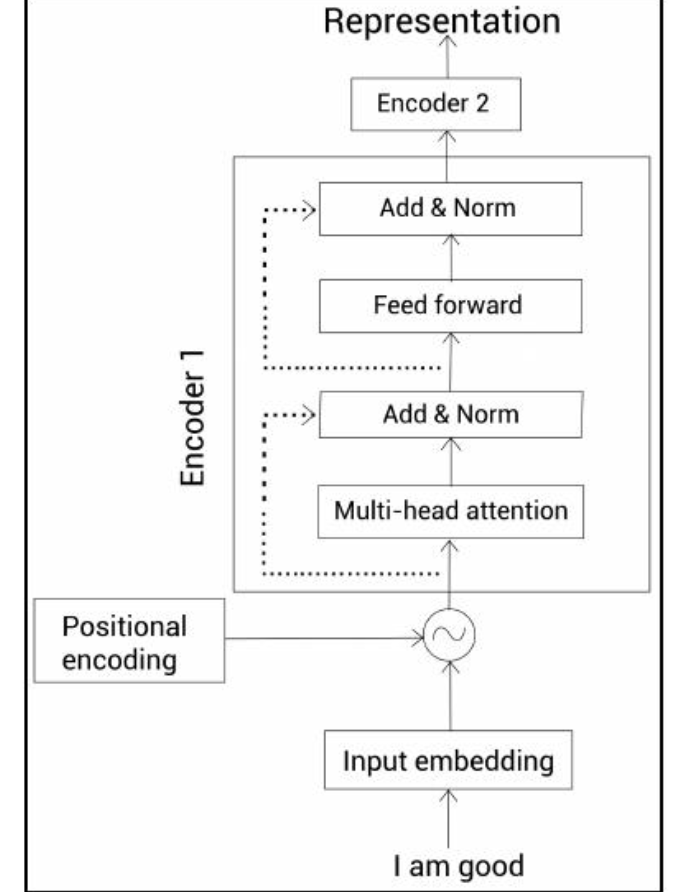

Comprenons maintenant comment l'encodeur du transformateur va nous aider. Nous savons que le transformateur se compose de nombreux encodeurs $(1,2....L)$

Représentons l'encodeur par $l$ et la représentation de l'état caché obtenue à partir de l'encodeur par $h$. Donc$h^l$, désigne la représentation de l'état caché obtenue à partir d'un encodeur $l$

Nous alimentons la représentation de la phrase $R$ obtenue à partir de BERT en tant qu'entrée de l'encodeur. Avant d'alimenter l'entrée directement dans l'encodeur, nous ajoutons les plongements positionnels. La représentation d'entrée avec l'intégration de position est représentée comme $h^0$

$$h^0=PosEmb(R)$$

Dans l'équation précédente, PosEmb désigne le plongement positionnel. Maintenant, nous alimentons l'entrée $h^0$ à l'encodeur. Nous avons appris que chaque encodeur se compose de deux sous-couches - une couche d'attention multi-têtes et un réseau feedforward.

L'encodeur le plus haut est représenté par $L$ et la représentation de l'état caché obtenue à partir de l'encodeur le plus haut est représentée pa $h^L$ . Nous prenons la représentation de l'état caché obtenue à partir de l'encodeur le plus haut et la transmettons au classificateur sigmoïde, qui renvoie la probabilité d'inclure la phrase dans le résumé

$$Y_i=\sigma(W_0 h^l+b_0)$$


En un mot, nous prenons la représentation $R_i$$d'une phrase $i$ obtenue à partir de BERT et la transmettons à l'encodeur du transformateur. L'encodeur prend cette représentation en entrée et renvoie la représentation de l'état caché obtenue à partir de l'encodeur le plus haut en sortie $h^l$

Ensuite, nous transmettons la représentation de l'état caché au classificateur sigmoïde, qui renvoie la probabilité d'inclure la phrase dans le résumé. Ainsi, au lieu d'utiliser la représentation directement depuis le BERT, nous la transmettons à l'encodeur et utilisons la représentation . La figure suivante nous éclaire

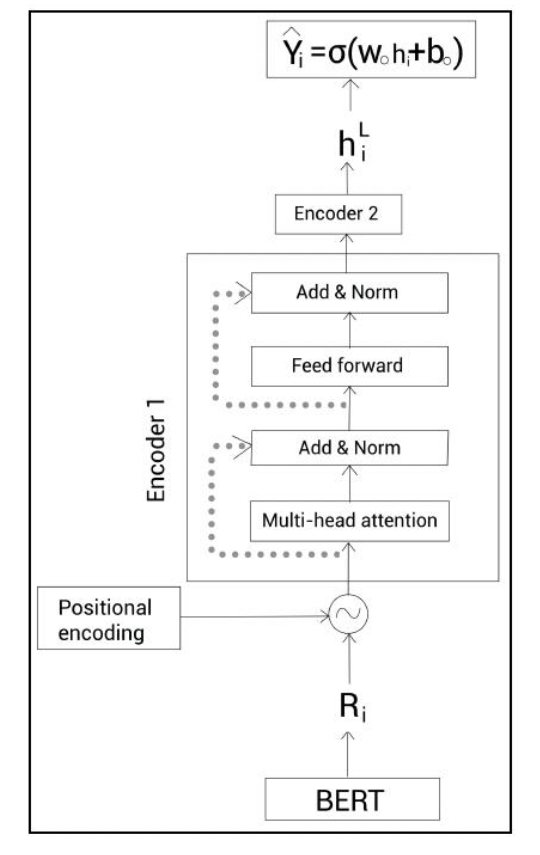

Maintenant que nous avons appris à utiliser BERTSUM avec un transformateur inter-phrase, dans la section suivante, voyons comment utiliser BERTSUM avec LSTM

## BERTSUM avec LSTM 

Nous prenons la représentation d'une phrase obtenue de BERT et la transmettons à la cellule LSTM. La cellule LSTM prend cette représentation en entrée et renvoie une représentation d'état cachée en sortie. Ensuite, nous alimentons la représentation de l'état caché au classificateur sigmoïde, qui renvoie la probabilité d'inclure la phrase dans le résumé

Ainsi, au lieu d'utiliser la représentation directement du modèle BERT, nous la transmettons au LSTM et utilisons la représentation . La figure suivante nous éclaire :

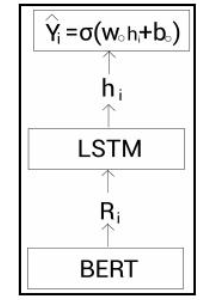

Nous avons appris à affiner le BERT pré-entraîné pour une tâche de résumé extractif. Pouvons-nous également utiliser BERT pour effectuer un résumé abstrait ? Oui! Nous allons en apprendre davantage à ce sujet dans la section suivante. 


## Résumé abstrait à l'aide de BERT 

Dans cette section, nous allons apprendre à effectuer un résumé abstrait à l'aide de BERT. Nous savons que dans le résumé abstrait, notre objectif est de créer un résumé en paraphrasant le texte donné. C'est-à-dire que dans le résumé abstrait, étant donné un texte, nous allons créer un résumé en ré-exprimant le texte donné en utilisant des mots différents ne contenant que le sens essentiel du texte donné. 

Mais comment pouvons-nous faire cela avec BERT ? Parce que BERT ne renverra que la représentation des jetons. Comment générer un nouveau texte avec BERT ?

 Explorons ce détail. Pour effectuer une synthèse abstraite, nous utilisons le modèle de transformateur avec une architecture encodeur-décodeur. 
 
 Nous transmettons le texte d'entrée à l'encodeur et l'encodeur renverra la représentation du texte d'entrée donné. Nous prenons la représentation renvoyée par l'encodeur et l'alimentons en entrée du décodeur. 
 
 Le décodeur utilise cette représentation et génère le résumé. Nous avons déjà appris à affiner BERTSUM dans la section précédente. Nous avons appris à utiliser BERTSUM pour générer une représentation de phrase. Maintenant, dans notre modèle de transformateur avec architecture encodeur-décodeur, nous pouvons utiliser BERTSUM pré-entraîné comme encodeur. Ainsi, le modèle BERTSUM pré-entraîné générera une représentation significative et le décodeur utilisera cette représentation et apprendra à générer le résumé. 
 
 Il y a un petit problème ici : dans notre modèle de transformateur, l'encodeur est un modèle BERTSUM pré-entraîné mais le décodeur est aléatoire initialisé. Cela entraînera un écart lors du réglage fin. Étant donné que l'encodeur est déjà pré-entraîné, il peut suradapter et puisque le décodeur n'est pas pré-entraîné, il peut être sous-adapté.

 
Ainsi, pour lutter contre cela, nous utilisons deux optimiseurs Adam, un pour l'encodeur et l'autre pour le décodeur. Nous utilisons différents taux d'apprentissage pour l'encodeur et le décodeur. Étant donné que l'encodeur est déjà pré-entraîné, nous définissons le petit taux d'apprentissage et la décroissance en douceur pour l'encodeur.

Le processus de résumé abstrait est illustré dans la figure suivante

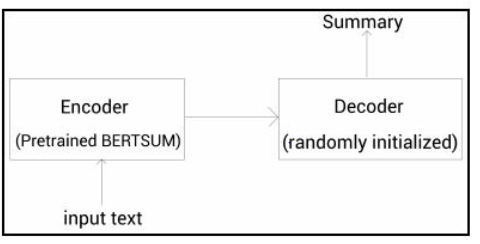

À partir de la figure précédente, nous pouvons observer comment la synthèse abstraite se produit avec BERTSUM pré-entraîné en tant qu'encodeur et décodeur initialisé de manière aléatoire. 

On peut appeler notre modèle BERTSUMABS (BERT pour résumé abstrait). Nous avons appris à affiner le BERT pour une synthèse extractive et abstraite. Mais comment mesurer la performance de BERTSUM ? Avec quelle précision notre modèle BERTSUM effectue-t-il une synthèse ? Nous en discuterons dans la section suivante

## Comprendre les métriques d'évaluation ROUGE 

Afin d'évaluer une tâche de résumé de texte, nous utilisons un ensemble populaire de métriques appelé ROUGE, qui signifie Recall-Oriented Understudy for Gisting Evaluation. 

Tout d'abord, nous allons comprendre comment fonctionne la métrique ROUGE, puis nous vérifierons le score ROUGE pour la synthèse de texte avec le modèle BERTSUM. La métrique ROUGE a été introduite pour la première fois dans l'article ROUGE: A Package for AutomaticEvaluation of Summaries par Chin-Yew Lin. Les cinq métriques d'évaluation différentes de ROUGE incluent les éléments suivants

* ROUGE-N
* ROUGE-L
* ROUGE-W
* ROUGE-S
* ROUGE-SU

Nous nous concentrerons uniquement sur ROUGE-N et ROUGE-L. Tout d'abord, comprenons comment ROUGE-N est calculé, puis nous examinerons ROUGE-L

## Comprendre la métrique ROUGE-N 

ROUGE-N est un rappel n-gramme entre un résumé candidat (résumé prédit) et un résumé de référence (résumé réel). Le rappel est défini comme un rapport du nombre total de n-grammes qui se chevauchent entre le candidat et le résumé de référence sur le nombre total de n-grammes dans le résumé de référence :

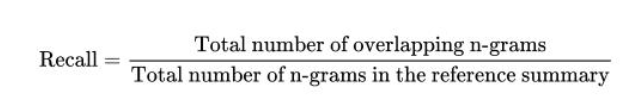

## ROUGE-1 

ROUGE-1 est un rappel d'unigramme entre un résumé candidat (résumé prévisionnel) et un résumé de référence (résumé réel). Considérez le candidat suivant et le résumé des références :

* Candidate summary – Machine learning is seen as a subset of artificialintelligence. 

* Reference summary – Machine Learning is a subset of artificial intelligence

Maintenant, nous pouvons calculer ROUGE-1 comme suit

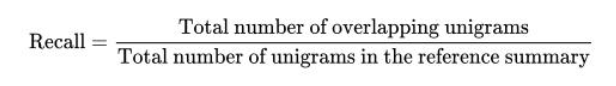

Les unigrammes dans le résumé du candidat et de la référence sont donnés comme suit


* Candidate summary unigrams – Machine, learning, is, seen, as, a, subset, of,artificial, intelligence. 

* Reference summary unigrams – Machine, Learning, is, a, subset, of, artificial,intelligence

On peut observer que le nombre total d'unigrammes qui se chevauchent entre le candidat et le résumé de référence est de 8 et que le nombre total d'unigrammes dans le résumé de référence est également de 8. Ainsi, nous pouvons calculer le rappel comme suit

$$Recall= \frac{8}{8}=1$$

Ainsi, notre score ROUGE-1 est 1. Ensuite, nous verrons comment calculer ROUGE-2

## ROUGE-2 
est un rappel bigramme entre un résumé candidat (résumé prédit) et un résumé de référence (résumé réel). Considérons le même candidat et les mêmes références résumé

* Candidate summary – Machine learning is seen as a subset of artificialintelligence. 

* Reference summary – Machine Learning is a subset of artificial intelligence

Maintenant, nous pouvons calculer ROUGE-2 comme suit

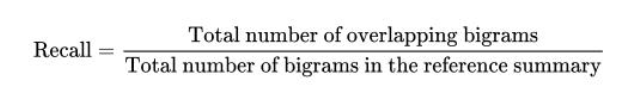

Les bigrammes dans le candidat et le résumé de référence sont donnés comme suit#


* Candidate summary bigrams – (machine learning), (learning is), (is seen), (seen as), (as a), (a subset), (subset of), (of artificial) (artificial intelligence) 

* Reference summary bigrams – (machine learning), (learning is), (is a), (a subset),(subset of), (of artificial) (artificial intelligence)

Nous pouvons observer que le nombre total de bigrammes qui se chevauchent entre le résumé candidat et de référence est de 6 et le nombre total de bigrammes dans le résumé de référence est de 7. Ainsi, nous pouvons calculer le rappel comme suit

$$Recall=\frac{6}{7}=0.85$$

Ainsi, notre score ROUGE-2 est de 0,85. De cette manière, nous pouvons calculer le score ROUGE-N pour les n-grammes. Maintenant que nous avons compris comment ROUGE-N est calculé, voyons comment fonctionne la métrique ROUGE-L dans la section suivante.

## Comprendre ROUGE-L 

ROUGE-L est basé sur la plus longue sous-séquence commune (LCS). 

Le LCS entre deux séquences est la sous-séquence commune avec une longueur maximale. Ainsi, si le résumé candidat et de référence ont un LCS, alors nous pouvons dire que notre résumé candidat correspond au résumé de référence. ROUGE-L est calculé en utilisant la F-mesure. Avant de regarder la F-mesure, voyons comment le rappel et la précision sont calculés pour ROUGE-L. 

Le rappel est calculé comme le rapport du LCS entre le résumé candidat et de référence sur le nombre total de mots dans le résumé de référence

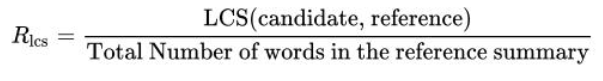


La précision est calculée comme le rapport du LCS entre le résumé du candidat et le résumé de référence sur le nombre total de mots dans le résumé du candidat

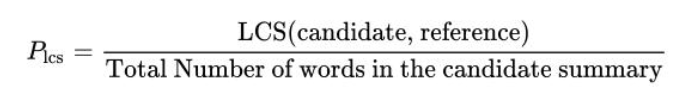

Maintenant, la F-mesure est calculée comme suit

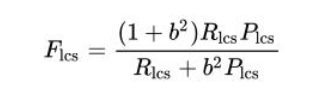

Dans l'équation précédente, $b$ est utilisé pour contrôler l'importance de la précision et du rappel. La mesure F précédente est essentiellement le score ROUGE-L. Nous avons appris à calculer les scores ROUGE-N et ROUGE-L. Mais quel est le ROUGEscore de notre modèle BERTSUM ? Voyons cela dans la section suivante

## Les performances du modèle BERTSUM 

Les chercheurs de BERTSUM ont utilisé le jeu de données d'actualités CNN/DailyMail. L'ensemble de données CNN/DailyMail se compose d'articles de presse ainsi que de leurs points saillants. Nous avons divisé l'ensemble de données d'actualités CNN/DailyMail en ensembles de train et de test. Nous entraînons le modèle en utilisant le train set et l'évaluons sur le test set

Ce qui suit montre le score ROUGE d'une tâche de synthèse extractive utilisant BERTSUM avec un classificateur, un transformateur et LSTM. On peut observer que BERTSUM avec le transformateur se comporte légèrement mieux que les autres

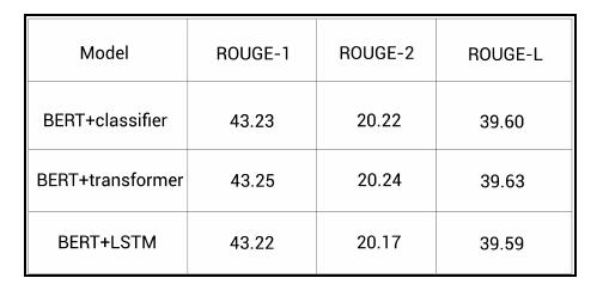

Ce qui suit montre le score ROUGE de la tâche de résumé abstrait utilisant BERTSUMABS

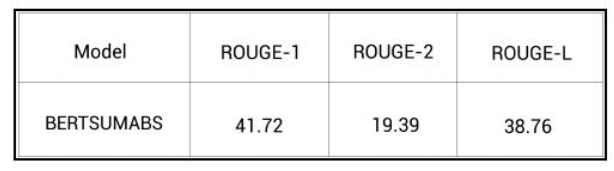

Ainsi, nous avons appris à affiner le modèle BERT pour les tâches de récapitulation abstraites et extractives. Dans la section suivante, nous verrons comment entraîner le modèle BERTSUM

## Entraînement du modèle BERTSUM 

Le code d'entraînement du modèle BERTSUM est open source par les chercheurs de BERTSUM et il est disponible sur https://github.com/nlpyang/BertSum.

Dans cette section, explorons cela et apprenons à entraîner le modèle BERTSUM. Nous entraînerons le modèle BERTSUM sur l'ensemble de données d'actualités CNN/DailyMail. 

In [ ]:

%%capture
!pip install pytorch_pretrained_bert
!pip install torch==1.1.0 pytorch_transformers tensorboardX multiprocess pyrouge
!pip install googleDriveFileDownloader

In [ ]:
!git clone https://github.com/nlpyang/BertSum.git

Cloning into 'BertSum'...
remote: Enumerating objects: 301, done.
remote: Total 301 (delta 0), reused 0 (delta 0), pack-reused 301
Receiving objects: 100% (301/301), 15.03 MiB | 17.61 MiB/s, done.
Resolving deltas: 100% (174/174), done.


In [ ]:
cd /content/BertSum/bert_data/

/content/BertSum/bert_data


In [ ]:

from googleDriveFileDownloader import googleDriveFileDownloader
gdrive = googleDriveFileDownloader()
gdrive.downloadFile("https://drive.google.com/uc?id=1x0d61LP9UAN389YN00z0Pv-7jQgirVg6&export=download")

Download is starting
FILENAME ::: bertsum_data.zip


0

In [ ]:
%%capture
!unzip /content/BertSum/bert_data/bertsum_data.zip

In [ ]:
cd /content/BertSum/src

/content/BertSum/src


In [ ]:
!python train.py -mode train -encoder classifier -dropout 0.1 -bert_data_path ../bert_data/cnndm -model_path ../models/bert_classifier -lr 2e-3 -visible_gpus 0 -gpu_ranks 0 -world_size 1 -report_every 50 -save_checkpoint_steps 1000 -batch_size 3000 -decay_method noam -train_steps 50 -accum_count 2 -log_file ../logs/bert_classifier -use_interval true -warmup_steps 10000

[2021-11-12 11:04:59,632 INFO] Device ID 0
[2021-11-12 11:04:59,633 INFO] Device cuda
THCudaCheck FAIL file=/pytorch/torch/csrc/cuda/Module.cpp line=33 error=38 : no CUDA-capable device is detected
Traceback (most recent call last):
  File "train.py", line 340, in <module>
    train(args, device_id)
  File "train.py", line 244, in train
    torch.cuda.set_device(device_id)
  File "/usr/local/lib/python3.7/dist-packages/torch/cuda/__init__.py", line 265, in set_device
    torch._C._cuda_setDevice(device)
RuntimeError: cuda runtime error (38) : no CUDA-capable device is detected at /pytorch/torch/csrc/cuda/Module.cpp:33
